# Algoritmo de Clustering (KMeans)

## Importar las librerias a utilizar

In [1]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

## Importar el data frame

In [2]:
df_alg_lim111 = pd.read_csv('2011_finished.csv', low_memory = False, encoding='latin')
df_alg_lim111.head()

,Unnamed: 0,r_def,loc,mun,est,est_d,ageb,t_loc,cd_a,ent,...,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins
0,0,0,1,2,32,7,0,1,1,9,...,99,2,12,1,2,2,99,3,2,4
1,1,0,1,3,24,5,0,1,1,9,...,99,2,99,1,99,99,99,99,99,99
2,2,0,1,3,24,5,0,1,1,9,...,99,1,19,1,1,2,99,3,1,4
3,3,0,1,3,24,5,0,1,1,9,...,99,2,20,1,2,2,99,3,2,5
4,4,0,1,5,24,5,0,1,1,9,...,99,99,99,99,99,99,99,99,99,99


## Eliminar columnas sin utilidad

In [3]:
df_alg_lim111.drop(df_alg_lim111.columns[df_alg_lim111.columns.str.contains('unnamed',case = False)],axis = 1)

,r_def,loc,mun,est,est_d,ageb,t_loc,cd_a,ent,d_sem,...,ma48me1sm,p14apoyos,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins
0,0,1,2,32,7,0,1,1,9,101,...,99,2,12,1,2,2,99,3,2,4
1,0,1,3,24,5,0,1,1,9,101,...,99,2,99,1,99,99,99,99,99,99
2,0,1,3,24,5,0,1,1,9,101,...,99,1,19,1,1,2,99,3,1,4
3,0,1,3,24,5,0,1,1,9,101,...,99,2,20,1,2,2,99,3,2,5
4,0,1,5,24,5,0,1,1,9,101,...,99,99,99,99,99,99,99,99,99,99
5,0,1,5,24,5,0,1,1,9,101,...,99,1,99,1,99,99,99,99,99,99
6,0,1,7,22,3,0,1,1,9,101,...,99,2,8,1,1,1,99,1,3,8
7,0,1,7,22,3,0,1,1,9,101,...,99,2,99,1,99,99,99,99,99,99
8,0,1,7,22,3,0,1,1,9,101,...,99,99,99,99,99,99,99,99,99,99
9,0,1,7,22,3,0,1,1,9,101,...,99,2,19,1,1,1,99,1,1,8


## Normalizar los datos

In [4]:
df_alg_lim111 = sk.preprocessing.normalize(df_alg_lim111, norm='l2', axis=1, copy=True)

## Crear un nuevo data frame ya normalizado

In [5]:
df_alg_lim111_norm = pd.DataFrame(df_alg_lim111)

In [6]:
df_alg_lim111_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,0.0,0.000268,0.000537,0.008590,0.001879,0.0,0.000268,0.000268,0.002416,...,0.026575,0.000537,0.003221,0.000268,0.000537,0.000537,0.026575,0.000805,0.000537,0.001074
1,0.000211,0.0,0.000211,0.000634,0.005071,0.001057,0.0,0.000211,0.000211,0.001902,...,0.020919,0.000423,0.020919,0.000211,0.020919,0.020919,0.020919,0.020919,0.020919,0.020919
2,0.000693,0.0,0.000346,0.001039,0.008313,0.001732,0.0,0.000346,0.000346,0.003117,...,0.034290,0.000346,0.006581,0.000346,0.000346,0.000693,0.034290,0.001039,0.000346,0.001385
3,0.000367,0.0,0.000122,0.000367,0.002937,0.000612,0.0,0.000122,0.000122,0.001101,...,0.012114,0.000245,0.002447,0.000122,0.000245,0.000245,0.012114,0.000367,0.000245,0.000612
4,0.001354,0.0,0.000339,0.001693,0.008125,0.001693,0.0,0.000339,0.000339,0.003047,...,0.033516,0.033516,0.033516,0.033516,0.033516,0.033516,0.033516,0.033516,0.033516,0.033516


In [7]:
df_alg_lim111_norm.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
        ...   
71     float64
72     float64
73     float64
74     float64
75     float64
76     float64
77     float64
78     float64
79     float64
80     float64
81     float64
82     float64
83     float64
84     float64
85     float64
86     float64
87     float64
88     float64
89     float64
90     float64
91     float64
92     float64
93     float64
94     float64
95     float64
96     float64
97     float64
98     float64
99     float64
100    float64
dtype: object

In [8]:
df_alg_lim111_norm = df_alg_lim111_norm.sample(frac=0.05, random_state=1)

df_alg_lim111_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
592021,0.999759,0.0,0.000005,0.000100,0.000174,0.000437,0.0,0.000005,0.000047,0.000042,...,0.000521,0.000521,0.000026,0.000005,0.000011,0.000011,0.000521,0.000016,0.000011,0.000011
408989,0.931796,0.0,0.000134,0.015948,0.002814,0.005763,0.0,0.000268,0.000536,0.002814,...,0.013267,0.013267,0.000134,0.000134,0.000134,0.000268,0.013267,0.000536,0.001206,0.001340
1212683,0.948672,0.0,0.000094,0.004724,0.003118,0.006992,0.0,0.000094,0.000756,0.002929,...,0.009354,0.009354,0.009354,0.000094,0.009354,0.009354,0.009354,0.009354,0.009354,0.009354
347950,0.999964,0.0,0.000003,0.000193,0.000057,0.001833,0.0,0.000009,0.000241,0.000060,...,0.000284,0.000006,0.000284,0.000003,0.000284,0.000284,0.000284,0.000284,0.000284,0.000284
420848,0.955552,0.0,0.000051,0.000203,0.001625,0.007873,0.0,0.000051,0.000914,0.001371,...,0.005029,0.005029,0.000406,0.000051,0.000051,0.000051,0.005029,0.000051,0.000152,0.000406


## Metodo Elbow

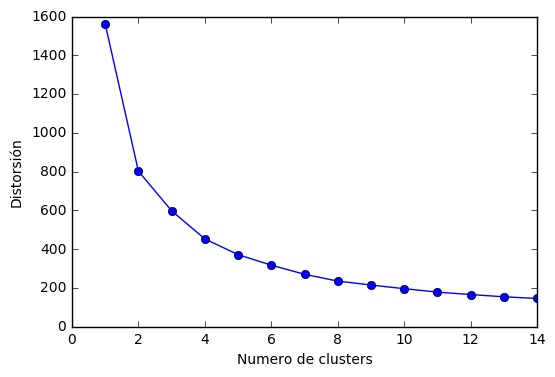

In [9]:
distortions = []

for i in range(1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_alg_lim111_norm)
    distortions.append(km.inertia_)

plt.plot(range(1,15), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [23]:
clusters = KMeans(n_clusters=5,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

#print(np.unique(clusters.fit_predict(X)))

In [24]:
y_km = clusters.fit_predict(df_alg_lim111_norm)
y_km

array([0, 3, 3, ..., 0, 0, 0])

In [25]:
y_km.min()

0

## Aplicar el metodo de KMeans

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
C:\Program Files\Anaconda3\lib\sit

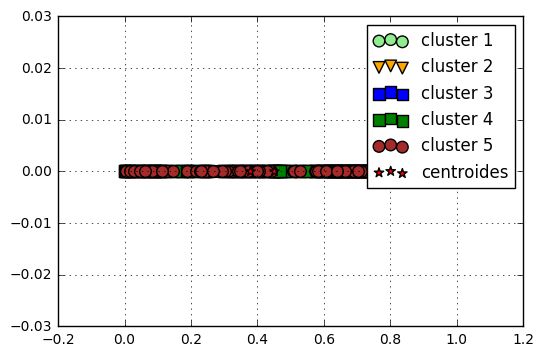

In [13]:
plt.scatter(df_alg_lim111[y_km==0,0],
          df_alg_lim111[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df_alg_lim111[y_km==1,0],
          df_alg_lim111[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df_alg_lim111[y_km==2,0],
          df_alg_lim111[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df_alg_lim111[y_km==3,0],
          df_alg_lim111[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(df_alg_lim111[y_km==4,0],
          df_alg_lim111[y_km==4,1],
          s=70,
          c='brown',
          edgecolor='black',
          marker='o',
          label='cluster 5')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  from ipykernel import kernelapp as app


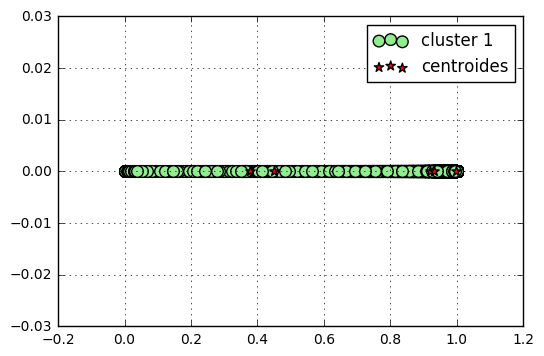

In [14]:
plt.scatter(df_alg_lim111[y_km==0,0],
          df_alg_lim111[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  from ipykernel import kernelapp as app


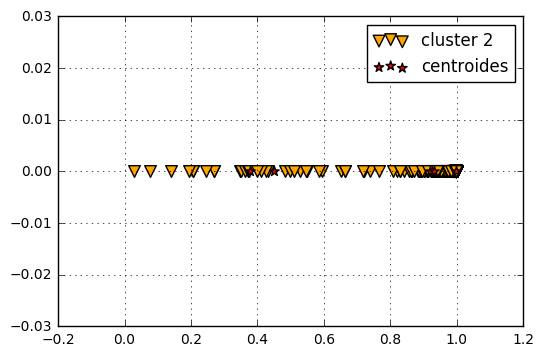

In [15]:
plt.scatter(df_alg_lim111[y_km==1,0],
          df_alg_lim111[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  from ipykernel import kernelapp as app


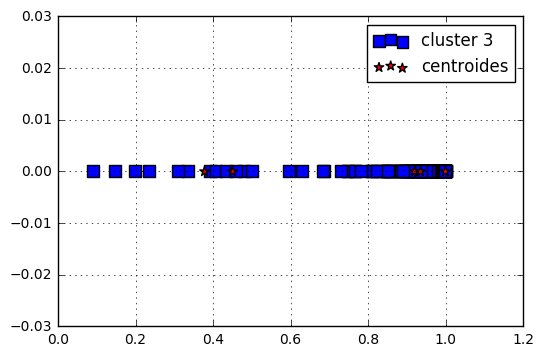

In [16]:
plt.scatter(df_alg_lim111[y_km==2,0],
          df_alg_lim111[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  from ipykernel import kernelapp as app


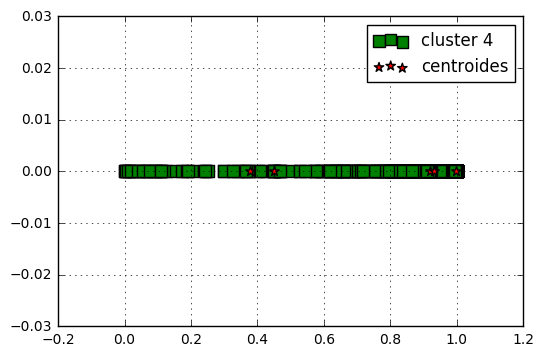

In [17]:
plt.scatter(df_alg_lim111[y_km==3,0],
          df_alg_lim111[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1602067 but corresponding boolean dimension is 80103
  from ipykernel import kernelapp as app


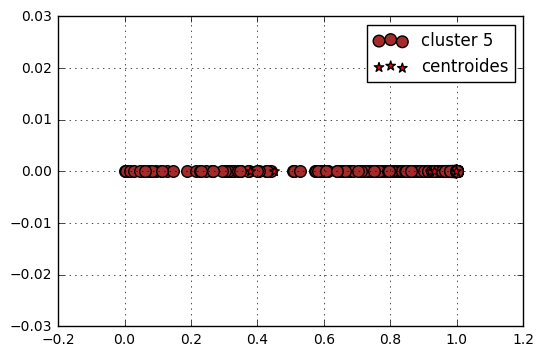

In [18]:
plt.scatter(df_alg_lim111[y_km==4,0],
          df_alg_lim111[y_km==4,1],
          s=70,
          c='brown',
          edgecolor='black',
          marker='o',
          label='cluster 5')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

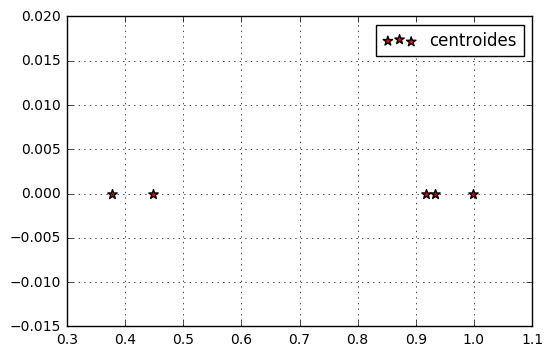

In [19]:
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()